In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss

In [ ]:
data_heart=pd.read_csv("/content/heart.csv")
data_o2saturation=pd.read_csv("/content/o2Saturation.csv")

In [ ]:
data_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data_o2saturation

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [ ]:
data_o2saturation.columns=["o2_saturation"]
df=data_heart.merge(data_o2saturation,left_index=True,right_index=True)
new_columns=['age','sex','chest pain','resting blood pressure','serum cholesterol in mg/L','fasting blood sugar','resting electrocardiographic result','maximum heart rate achieved','Exercice induced angina','ST depression induced by exercice relative to rest','The slope of the peak exercice ST exercice',' Number of major vessels','thal','Presence of heart disease','o2_saturation']
print(len(new_columns))
df.columns=new_columns

15


In [ ]:
df.describe()


,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


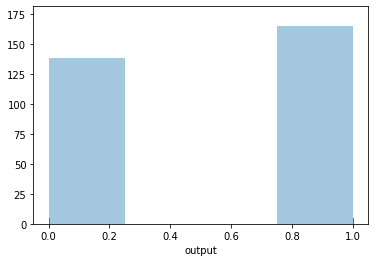

In [ ]:
## Searching for transactions with abnormally high order value
sns.distplot(data_heart.output, kde=False, rug=True)

In [ ]:
df.isnull().sum()

age                                                   0
sex                                                   0
chest pain                                            0
resting blood pressure                                0
serum cholesterol in mg/L                             0
fasting blood sugar                                   0
resting electrocardiographic result                   0
maximum heart rate achieved                           0
Exercice induced angina                               0
ST depression induced by exercice relative to rest    0
The slope of the peak exercice ST exercice            0
 Number of major vessels                              0
thal                                                  0
Presence of heart disease                             0
o2_saturation                                         0
dtype: int64

In [ ]:
df['chest pain'].unique()
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df[df.duplicated()]
df=df.drop_duplicates()

In [ ]:
df[df.duplicated()]


,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation


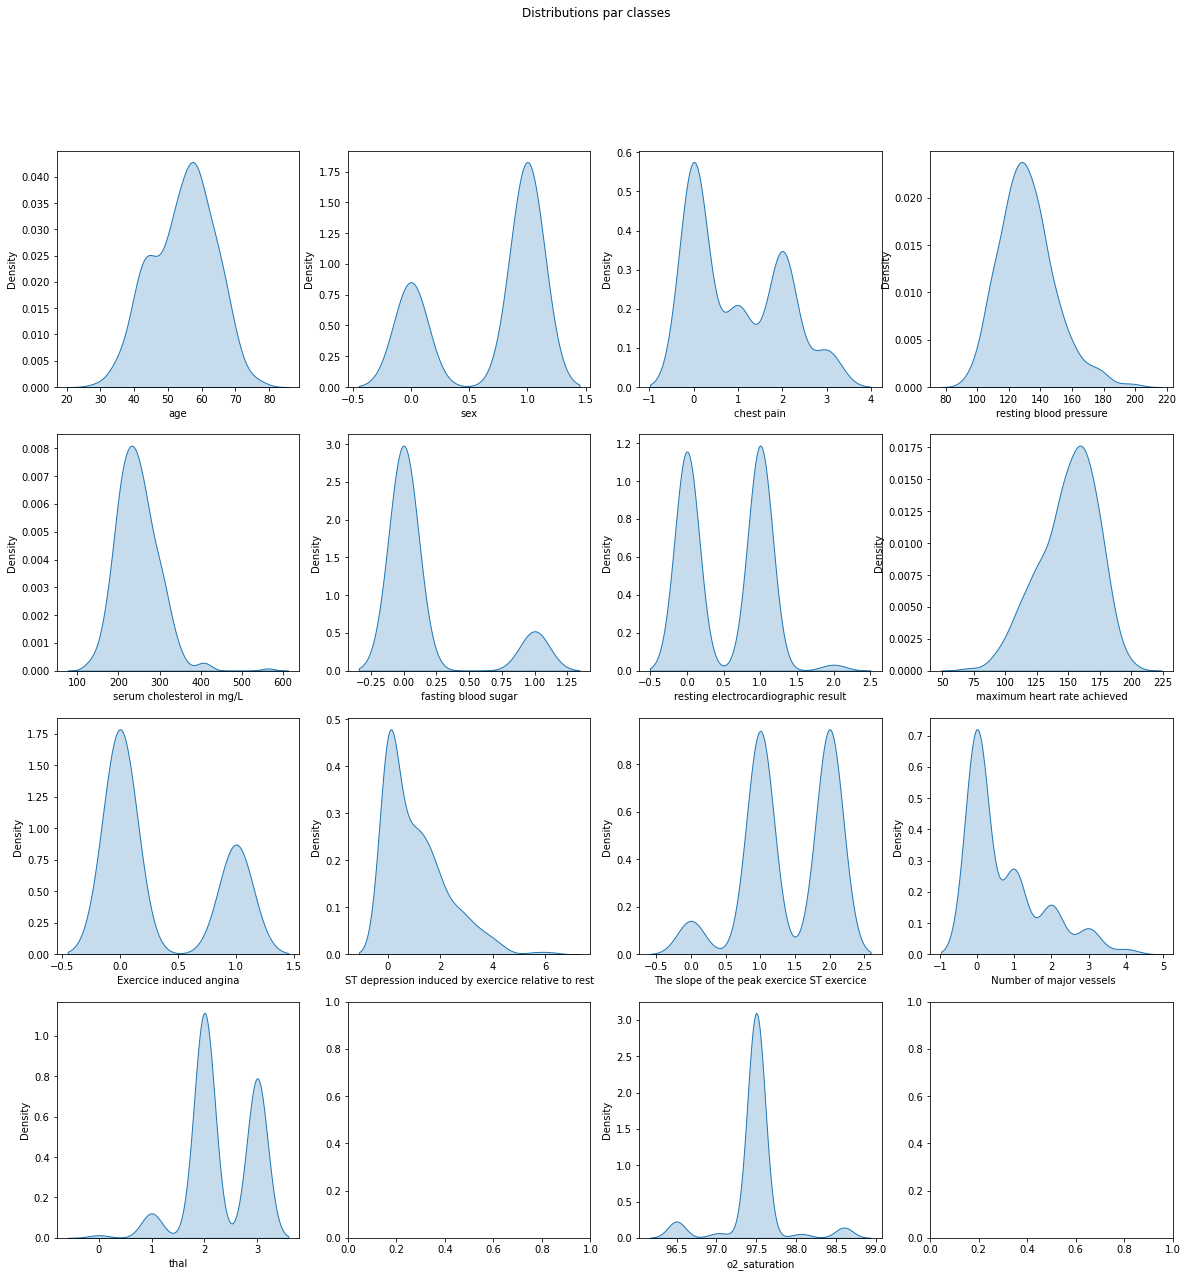

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

fig.suptitle('Distributions par classes')
c=0
for i in range(4):
  for j in range(4):
    col = df.columns[c]
    if col != 'Presence of heart disease':
      sns.kdeplot(data=df,x=col,ax=axes[i, j],fill=True)
    c +=1
    if c==15:
      break
plt.show()

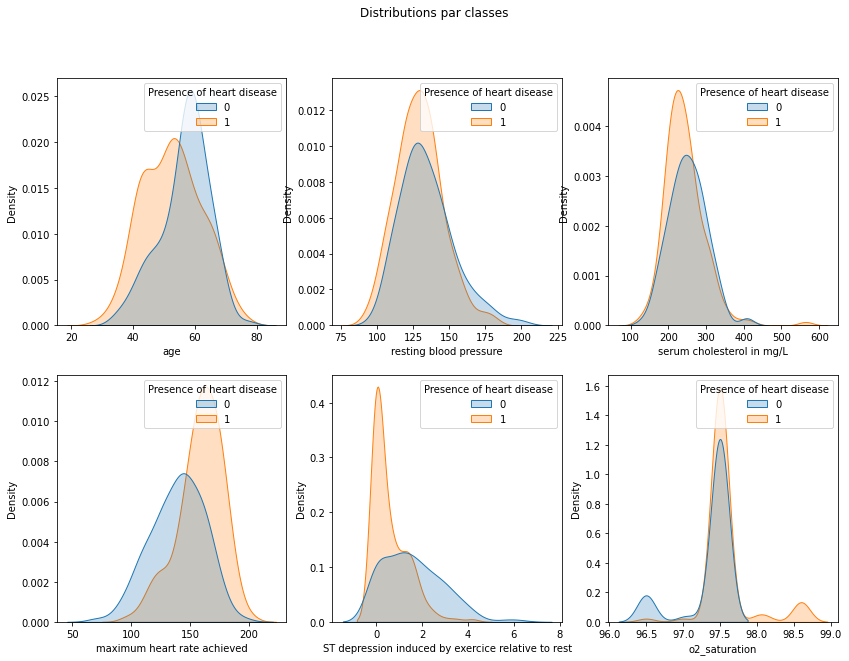

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

fig.suptitle('Distributions par classes')
c=0
for i in range(2):
  for j in range(3):
    col = col_num[c]
    if col != 'output':
      sns.kdeplot(data=df,x=col,hue='Presence of heart disease',ax=axes[i, j],fill=True)
    c +=1
    if c==15:
      break
plt.show()

In [ ]:
col_num=['age','resting blood pressure','serum cholesterol in mg/L','maximum heart rate achieved','ST depression induced by exercice relative to rest','o2_saturation']

col_cat=list(set(df.columns)-set(col_num))
col_cat

['resting electrocardiographic result',
 'thal',
 'chest pain',
 'The slope of the peak exercice ST exercice',
 'Exercice induced angina',
 'fasting blood sugar',
 ' Number of major vessels',
 'sex',
 'Presence of heart disease']

In [ ]:
df

,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


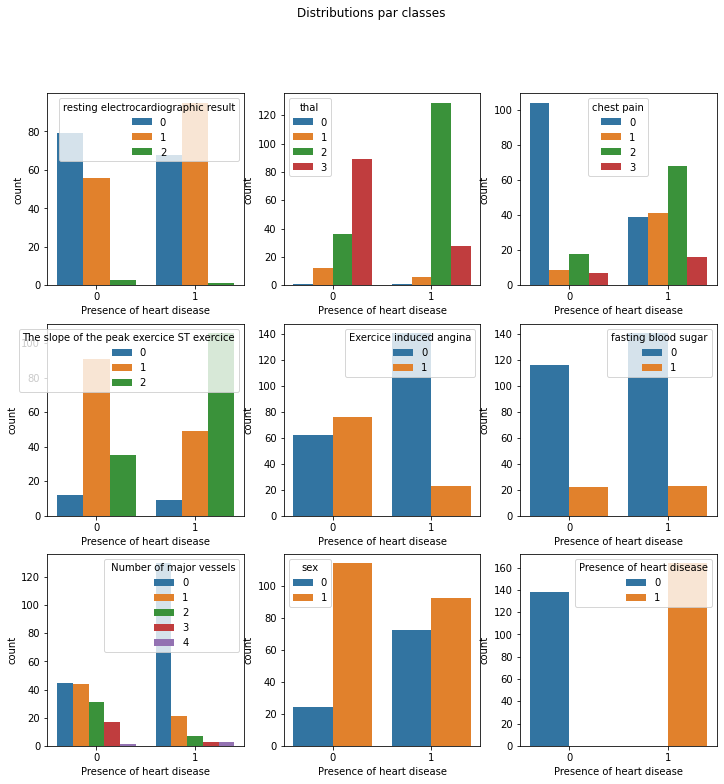

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

fig.suptitle('Distributions par classes')
c=0
for i in range(3):
  for j in range(3):
    col = col_cat[c]
    sns.countplot(data=df,x='Presence of heart disease',hue=col,ax=axes[i, j])
    c +=1
   
plt.show()

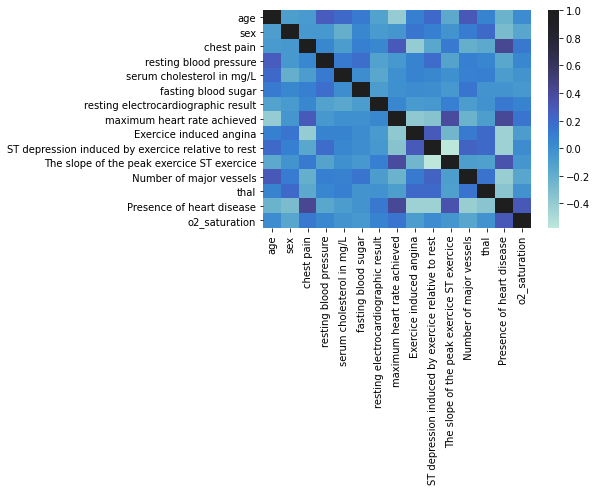

In [ ]:
sns.heatmap(df.corr(),center=True)

In [ ]:
df

,age,sex,chest pain,resting blood pressure,serum cholesterol in mg/L,fasting blood sugar,resting electrocardiographic result,maximum heart rate achieved,Exercice induced angina,ST depression induced by exercice relative to rest,The slope of the peak exercice ST exercice,Number of major vessels,thal,Presence of heart disease,o2_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


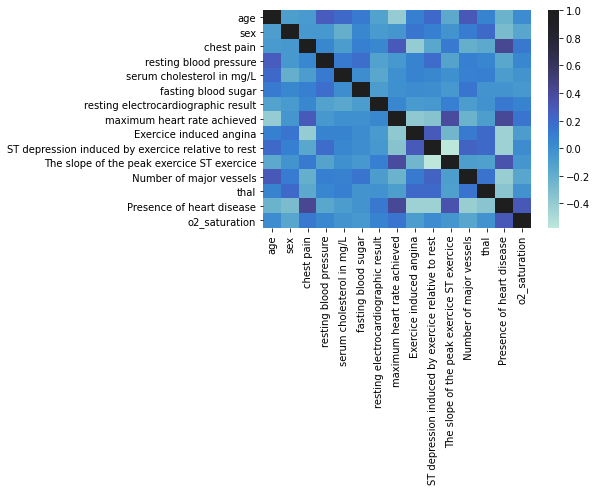

In [ ]:
sns.heatmap(df.corr(),center=True)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

In [ ]:
df_norm=(df-df.mean())/df.std()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


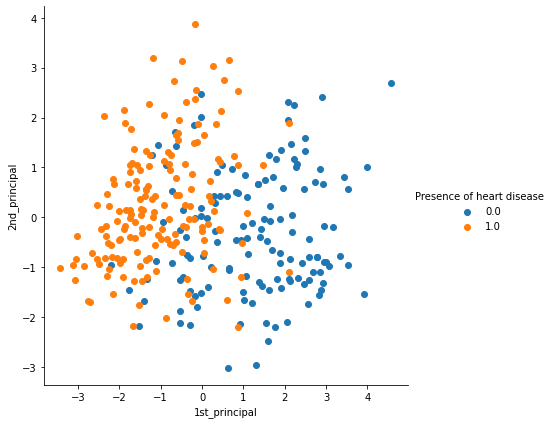

In [ ]:
reduced_df=pca.fit_transform(df_norm.drop(columns=['Presence of heart disease']))
pca_data = np.vstack((reduced_df[:,0:2].T, df['Presence of heart disease'])).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","Presence of heart disease"))
#sns.scatterplot( x=reduced_df[:,0], y=reduced_df[:,1],c=df['Presence of heart disease'])
sn.FacetGrid(pca_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()




In [ ]:
reduced_df.shape

(302, 13)

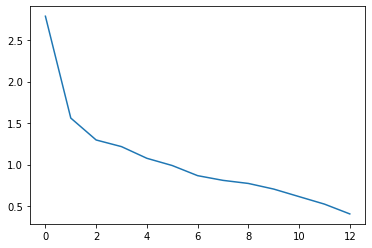

In [ ]:
plt.plot(pca.explained_variance_)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


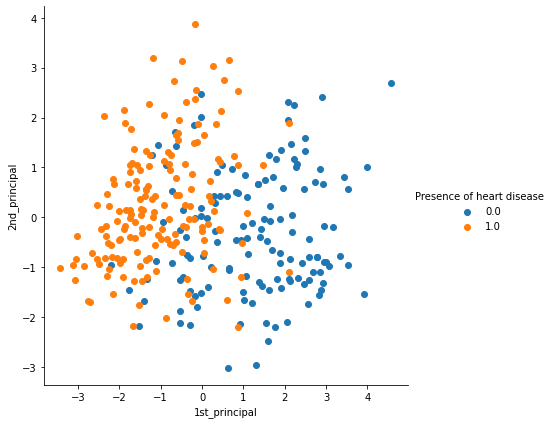

In [ ]:
# Visualizing PCA from Sklearn
pca_data = np.vstack((reduced_df[:,0:2].T, df['Presence of heart disease'])).T
import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "Presence of heart disease"))
sn.FacetGrid(pca_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
from sklearn.manifold import SpectralEmbedding

In [ ]:
se=SpectralEmbedding(n_jobs=-1,n_components=4)
se_df=se.fit_transform(df_norm)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


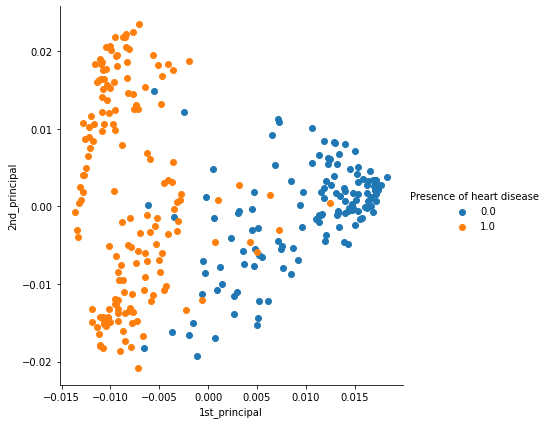

In [ ]:
pca_data = np.vstack((se_df[:,0:2].T, df['Presence of heart disease'])).T
import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","Presence of heart disease"))
sn.FacetGrid(pca_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
!pip install umap-learn

In [ ]:
import umap
u_df=umap.UMAP().fit_transform(df_norm)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


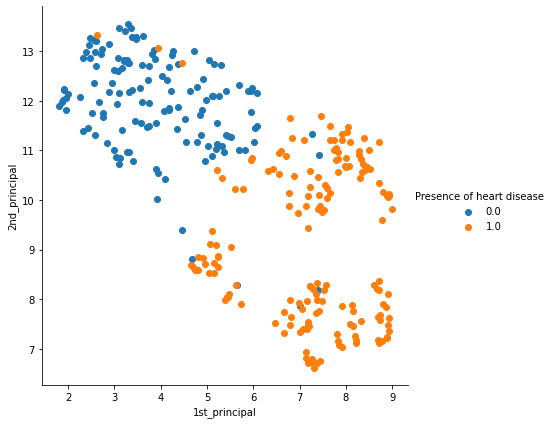

In [ ]:
pca_data = np.vstack((u_df[:,0:2].T, df['Presence of heart disease'])).T
import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "Presence of heart disease"))
sn.FacetGrid(pca_df, hue="Presence of heart disease", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
#X=df.drop(columns=['Presence of heart disease'])
X=u_df
y=df['Presence of heart disease']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb=XGBClassifier(n_estimators=35)
xgb.fit(xtrain,ytrain)
y_pred=xgb.predict(xtest)
accuracy_score(ytest,y_pred)

0.9836065573770492

In [ ]:
df_tension = (df.groupby("Presence of heart disease", as_index=False)["resting blood pressure"]
                      .mean()
                      .sort_values(by="resting blood pressure"))

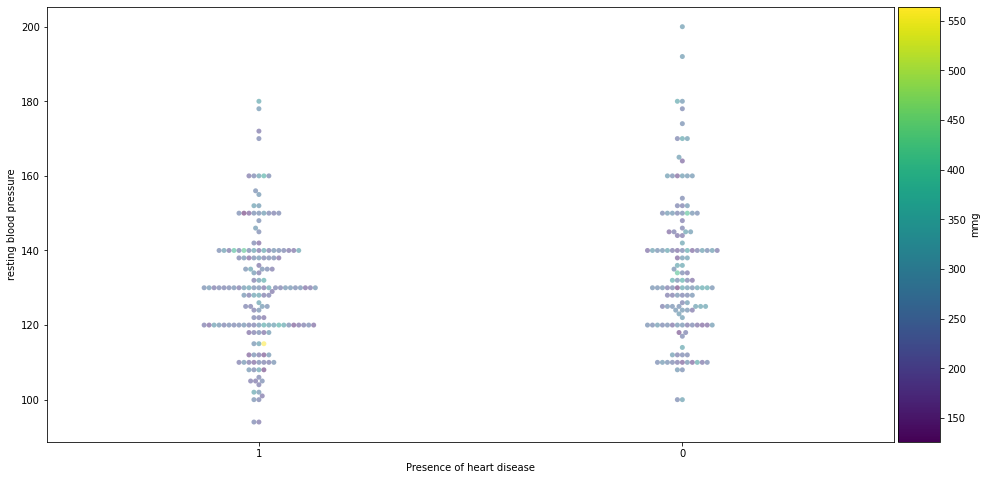

In [ ]:
#! long-running cell
#resting blood pressure
#cholesterol 
#blood sugar

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
#df = df.sample(frac=0.9)
# code adapted from https://stackoverflow.com/questions/40814612/map-data-points-to-colormap-with-seaborn-swarmplot
#Create a matplotlib colormap from the sns viridis color palette
cmap = plt.get_cmap("viridis")
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=df["serum cholesterol in mg/L"].min(), vmax=df["serum cholesterol in mg/L"].max())
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cval in df["serum cholesterol in mg/L"].values:
    colors.update({cval : cmap(norm(cval))})

# swarmplot is longer to plot because it plots all points individually. Sampling may help. Data missing for the 15th is an issue then.
chart = sns.swarmplot(data=df, x="Presence of heart disease", y="resting blood pressure", 
                      hue="serum cholesterol in mg/L", palette=colors, ax=ax, order=df_tension["Presence of heart disease"],
                      alpha=0.5); # transparency
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('mmg')